In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


In [2]:
#data loading
data = pd.read_csv(r'..\data\FuelConsumption.csv')

In [3]:
data.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
data.drop(columns=["MODELYEAR","MAKE","MODEL", "TRANSMISSION"], inplace=True)

In [7]:
data[['FUELTYPE']].value_counts()

FUELTYPE
X           514
Z           434
E            92
D            27
Name: count, dtype: int64

In [8]:
data[['VEHICLECLASS']].value_counts()

VEHICLECLASS            
MID-SIZE                    178
COMPACT                     172
SUV - SMALL                 154
SUV - STANDARD              110
FULL-SIZE                    86
TWO-SEATER                   71
SUBCOMPACT                   65
PICKUP TRUCK - STANDARD      62
MINICOMPACT                  47
STATION WAGON - SMALL        36
VAN - PASSENGER              25
VAN - CARGO                  22
MINIVAN                      14
PICKUP TRUCK - SMALL         12
SPECIAL PURPOSE VEHICLE       7
STATION WAGON - MID-SIZE      6
Name: count, dtype: int64

In [9]:
data.drop(columns=['VEHICLECLASS', 'FUELTYPE'], inplace=True)

In [10]:
data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [11]:
data.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


array([[<Axes: title={'center': 'ENGINESIZE'}>]], dtype=object)

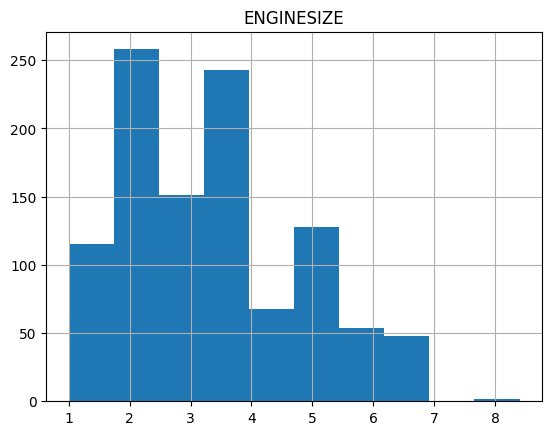

In [12]:
data[['ENGINESIZE']].hist()

array([[<Axes: title={'center': 'CYLINDERS'}>]], dtype=object)

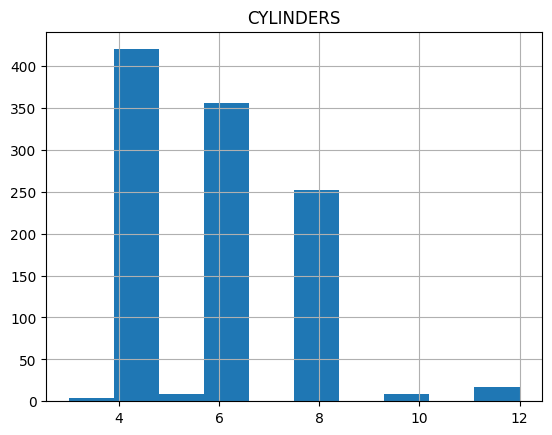

In [13]:
data[['CYLINDERS']].hist()

array([[<Axes: title={'center': 'FUELCONSUMPTION_COMB'}>]], dtype=object)

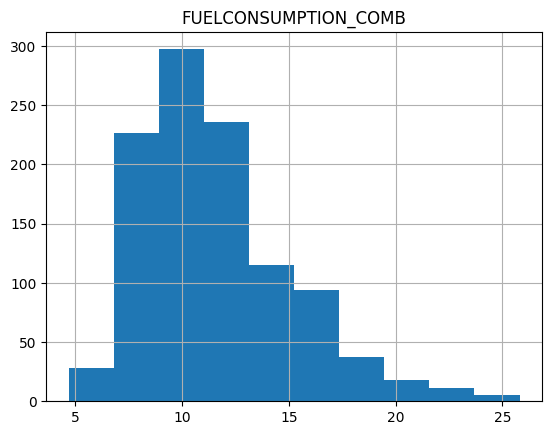

In [14]:
data[['FUELCONSUMPTION_COMB']].hist()

In [15]:
# Feature Selection
data.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


<Axes: >

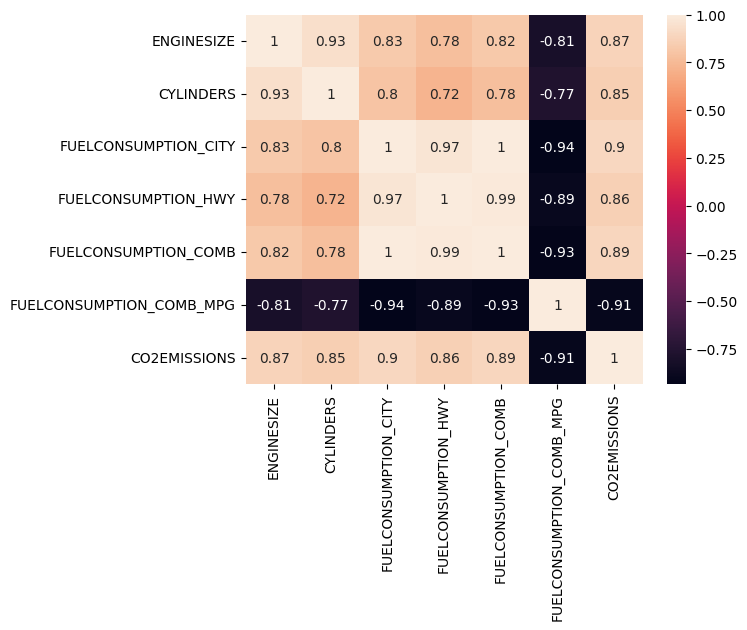

In [16]:
sns.heatmap(data.corr(), annot=True)

In [17]:
data.drop(columns=['FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB'], inplace=True)

<Axes: >

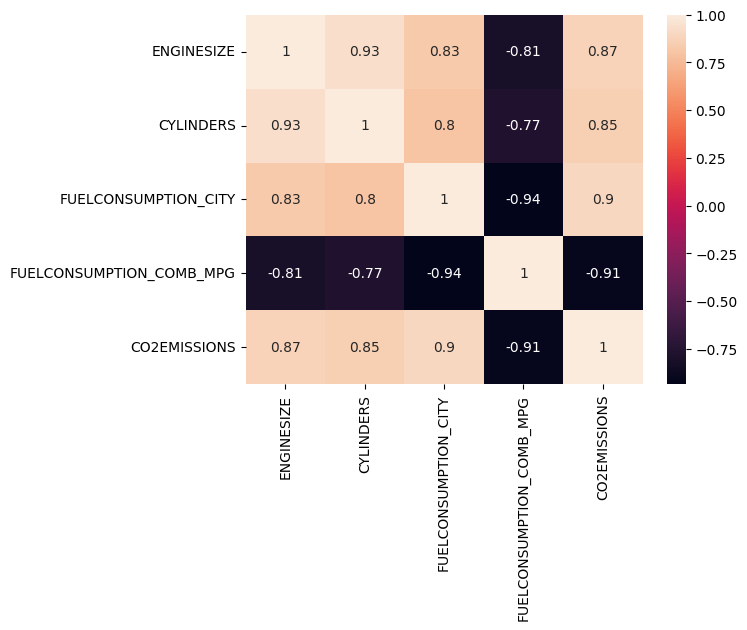

In [18]:
sns.heatmap(data.corr(), annot=True)

In [19]:
feature = data.drop(columns=['CO2EMISSIONS'])
feature

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB_MPG
0,2.0,4,9.9,33
1,2.4,4,11.2,29
2,1.5,4,6.0,48
3,3.5,6,12.7,25
4,3.5,6,12.1,27
...,...,...,...,...
1062,3.0,6,13.4,24
1063,3.2,6,13.2,25
1064,3.0,6,13.4,24
1065,3.2,6,12.9,25


In [20]:
target = data[['CO2EMISSIONS']]
target

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244
...,...
1062,271
1063,264
1064,271
1065,260


In [21]:
# Spliting Data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(feature, target, test_size=0.25, random_state=1)

In [22]:
xtrain.shape, xtest.shape

((800, 4), (267, 4))

In [23]:
ytrain.shape, ytest.shape

((800, 1), (267, 1))

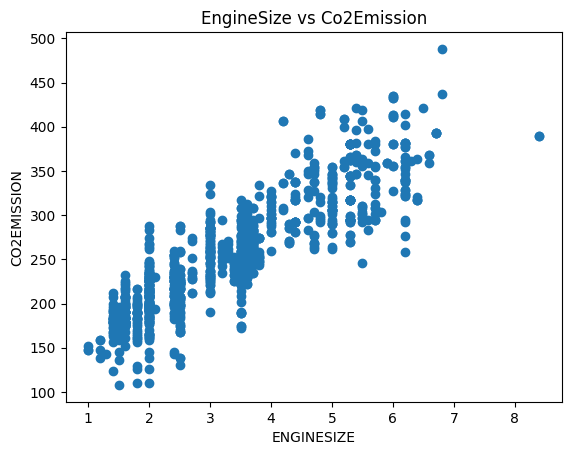

In [24]:
# Choosing Model

plt.scatter(feature.ENGINESIZE ,target.values)
plt.title("EngineSize vs Co2Emission")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSION")
plt.show()

In [25]:
# Modeling
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xtrain[['ENGINESIZE']], ytrain.values.ravel())

LinearRegression()

In [26]:
model.intercept_

np.float64(124.23458594672337)

In [27]:
model.coef_

array([39.54874496])

In [28]:
# Prediction
ypred = model.predict(xtest[['ENGINESIZE']])
xtest[['ENGINESIZE']].iloc[0], ypred[0], ytest.values[0]

(ENGINESIZE    3.0
 Name: 133, dtype: float64,
 np.float64(242.88082083279193),
 array([274]))

In [29]:
ytest.values[0] - ypred[0] 

array([31.11917917])

In [30]:
# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Absoulute Error: ", mean_absolute_error(ytest, ypred))
print("Mean Squarred Error: ", mean_squared_error(ytest, ypred))
print("R2 Score: ", r2_score(ytest, ypred))

Absoulute Error:  23.183704964940226
Mean Squarred Error:  947.2869872487785
R2 Score:  0.7633265438534859


In [31]:
model2 = LinearRegression()
model2.fit(xtrain[['CYLINDERS']], ytrain.values.ravel())
# Prediction
ypred = model2.predict(xtest[['CYLINDERS']])

print("Absoulute Error: ", mean_absolute_error(ytest, ypred))
print("Mean Squarred Error: ", mean_squared_error(ytest, ypred))
print("R2 Score: ", r2_score(ytest, ypred))

Absoulute Error:  25.14225028771549
Mean Squarred Error:  1060.6489957960428
R2 Score:  0.7350037876879928


In [32]:
# Linear Regression with FUELCONSUMPTION_CITY

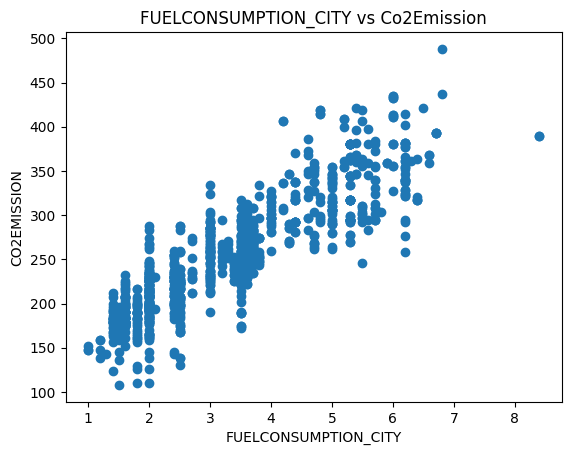

In [33]:
# Choosing Model

plt.scatter(feature.ENGINESIZE ,target.values)
plt.title("FUELCONSUMPTION_CITY vs Co2Emission")
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("CO2EMISSION")
plt.show()

In [34]:
model3 = LinearRegression()
model3.fit(xtrain[['FUELCONSUMPTION_CITY']], ytrain.values.ravel())
# Prediction
ypred = model3.predict(xtest[['FUELCONSUMPTION_CITY']])

print("Absoulute Error: ", mean_absolute_error(ytest, ypred))
print("Mean Squarred Error: ", mean_squared_error(ytest, ypred))
print("R2 Score: ", r2_score(ytest, ypred))

Absoulute Error:  20.185092379335014
Mean Squarred Error:  847.1415775522806
R2 Score:  0.788347219265608


In [35]:
ypred

array([260.52954326, 210.13416683, 204.53468056, 182.13673548,
       289.92684618, 207.3344237 , 191.93583645, 201.73493743,
       229.73236878, 196.13545116, 231.13224034, 267.5289011 ,
       204.53468056, 358.52055299, 201.73493743, 184.93647862,
       200.33506586, 312.32479126, 261.92941483, 225.53275407,
       492.90822347, 221.33313937, 246.53082759, 252.13031386,
       280.12774521, 236.73172661, 168.13801981, 242.33121288,
       190.53596489, 259.12967169, 214.33378153, 365.51991083,
       236.73172661, 371.1193971 , 268.92877267, 294.12646088,
       333.32286477, 180.73686391, 366.91978239, 256.32992856,
       236.73172661, 324.92363537, 231.13224034, 254.93005699,
       246.53082759, 212.93390997, 201.73493743, 148.53981786,
       176.53724921, 243.73108445, 197.53532272, 316.52440596,
       350.12132358, 324.92363537, 228.33249721, 268.92877267,
       210.13416683, 238.13159818, 260.52954326, 189.13609332,
       217.13352467, 249.33057072, 217.13352467, 201.73

In [36]:
model3.intercept_

np.float64(70.14701008083796)

In [37]:
model3.coef_

array([13.99871568])

In [38]:
# Prediction
ypred = model3.predict(xtest[['FUELCONSUMPTION_CITY']])
xtest[['FUELCONSUMPTION_CITY']].iloc[0], ypred[0], ytest.values[0]

(FUELCONSUMPTION_CITY    13.6
 Name: 133, dtype: float64,
 np.float64(260.529543261951),
 array([274]))

In [39]:
ytrain.values.ravel()

array([363, 297, 162, 179, 253, 170, 177, 239, 347, 196, 380, 232, 209,
       205, 301, 159, 315, 281, 235, 110, 242, 228, 359, 182, 221, 294,
       189, 488, 308, 235, 225, 186, 317, 145, 230, 306, 384, 276, 317,
       191, 290, 232, 338, 393, 281, 172, 248, 216, 228, 294, 292, 368,
       230, 262, 356, 196, 170, 244, 322, 166, 225, 179, 196, 138, 380,
       362, 209, 317, 264, 292, 347, 246, 182, 179, 239, 386, 262, 251,
       196, 228, 368, 172, 281, 258, 318, 278, 191, 179, 313, 189, 159,
       251, 147, 324, 258, 108, 237, 207, 262, 216, 271, 294, 262, 264,
       251, 228, 195, 276, 354, 242, 228, 258, 432, 292, 216, 230, 299,
       225, 254, 196, 216, 214, 331, 237, 200, 347, 281, 278, 262, 223,
       230, 193, 138, 277, 191, 260, 196, 244, 232, 214, 196, 163, 207,
       184, 294, 292, 344, 269, 200, 235, 214, 212, 216, 182, 193, 340,
       253, 362, 340, 370, 285, 230, 285, 222, 329, 297, 221, 212, 237,
       292, 152, 297, 198, 334, 267, 380, 278, 209, 264, 338, 22

In [40]:
xtest.values.ravel()

array([ 3. ,  6. , 13.6, ...,  4. ,  7.9, 41. ], shape=(1068,))